# Decision Tree Regression - Housing Price

## Import Necessary Libraries

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## -- ML Related LIbraries####
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [2]:
#### File Path = https://drive.google.com/file/d/1hBLdvnZxity2T4OL1NYo0c84LMv8T9rt/view
#### FileId = 1hBLdvnZxity2T4OL1NYo0c84LMv8T9rt

## Load Dataset for Housing Price

In [3]:
## For Google Drive
## file_id = "1hBLdvnZxity2T4OL1NYo0c84LMv8T9rt"
## url = f"https://drive.google.com/uc?id={file_id}"
url = 'https://github.com/vmahawar/data-science-datasets-collection/raw/main/housing_prices.csv'
df = pd.read_csv(url)

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df["mainroad"]=df["mainroad"].map({"yes":1,"no":0}) 
df["guestroom"]=df["guestroom"].map({"yes":1,"no":0}) 
df["basement"]=df["basement"].map({"yes":1,"no":0}) 
df["hotwaterheating"]=df["hotwaterheating"].map({"yes":1,"no":0}) 
df["airconditioning"]=df["airconditioning"].map({"yes":1,"no":0}) 
df["prefarea"]=df["prefarea"].map({"yes":1,"no":0}) 
df["furnishingstatus"]=df["furnishingstatus"].map({"furnished":0,"semi-furnished":1,"unfurnished":2})

In [6]:
# Missing Value imputation is not mandatory in Tree Models
# Scaling is not mandatory in Tree Models #In industry people do not do it
# Outlier Treatment is not mandatory in Tree Models #In industry people do not do it
# EDA still has to be done irresepctive of model algorithm

In [7]:
X = df.drop(["price"],axis=1)
y = df['price']

## Perform Train Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Validate the shape of train and test

In [9]:
X_train.shape

(381, 12)

In [10]:
X_test.shape

(164, 12)

## Try different criterion - MSE

In [11]:
dt = DecisionTreeRegressor(max_depth=2,criterion='squared_error')
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2)

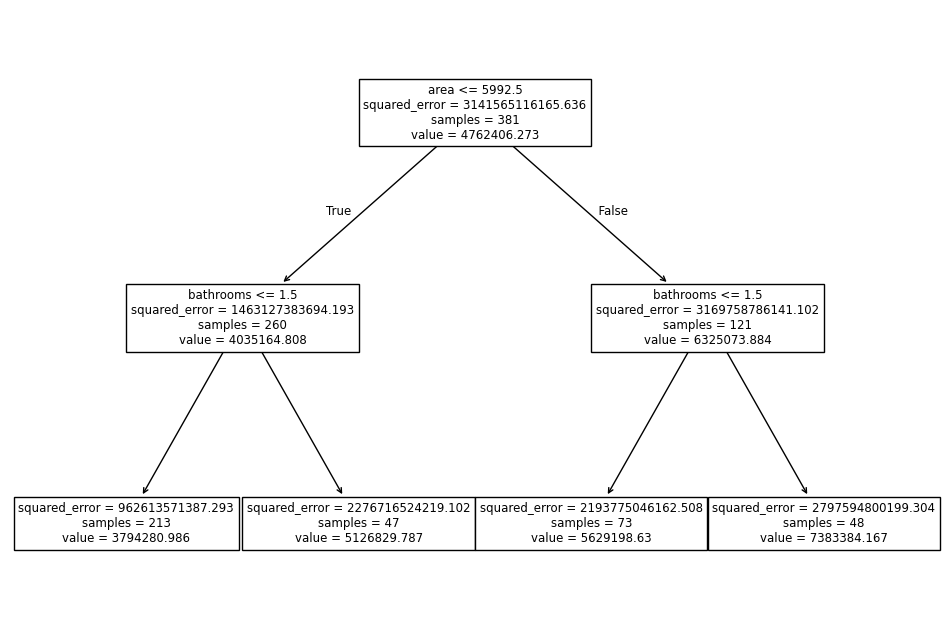

In [12]:
plt.figure(figsize=(12,8)) 
plot_tree(dt
          ,feature_names=['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']) 
plt.show()

In [13]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [14]:
# Print default parameters
print("Default splitting criterion:", dt.criterion)

Default splitting criterion: squared_error
